**FINAL PROJECT**

**Task 1: Creating the Dataset**:

This task focuses on extracting data from the rainbow.jpg image by turning each pixel into a row containing its coordinates and RGB values. The key challenge is accurately transforming the image data into a format suitable for analysis, which includes working with pixel locations and colors.

Step 1: Load the Image
We successfully loaded the image, and it's in RGB mode, meaning it contains only red, green, and blue channels without an alpha (transparency) channel. The dimensions of the image are 1603 pixels wide and 801 pixels tall.

Objective:
The goal was to load the image in a format that simplifies processing, and the RGB format ensures we only have to handle three color channels.

Challenges:
If the image had been in RGBA (with an alpha channel), we would have had to manage the transparency values or convert it. Fortunately, this image is already in RGB format, which simplifies our task.

In [1]:
# Step 1: Load the Image

# Import necessary libraries
from PIL import Image
import numpy as np

# Load the image from the local path
image_path = '/content/rainbow.jpg'
rainbow_image = Image.open(image_path)

# Check if the image has an alpha channel (RGBA) and convert to RGB if necessary
if rainbow_image.mode == 'RGBA':
    rainbow_image = rainbow_image.convert('RGB')

# Print the mode and size of the image for verification
print(f"Image Mode: {rainbow_image.mode}")
print(f"Image Size: {rainbow_image.size}")

Image Mode: RGB
Image Size: (1603, 801)


Step 2:Convert the Image to a NumPy Array

Objective: Convert the image into a NumPy array. This allows us to manipulate the pixel data programmatically.

Challenges: Ensuring that the NumPy array properly represents the image dimensions and RGB channels.

Outcome: The image is now represented as a NumPy array with a shape of (801, 1603, 3) — corresponding to 801 rows, 1603 columns, and 3 values (RGB) per pixel.

In [2]:
# Step 2: Convert the Image to a NumPy Array

# Convert the image to a NumPy array for easy manipulation of pixel data
rainbow_image_np = np.array(rainbow_image)

# Print the shape of the NumPy array to ensure it has the correct dimensions
print(f"NumPy Array Shape: {rainbow_image_np.shape}")

NumPy Array Shape: (801, 1603, 3)


Step 3: Extract Coordinates and RGB Values
In this step, we need to extract the x and y coordinates of each pixel along with its corresponding RGB values. Here's the approach we'll follow:

Create arrays for the x and y coordinates using NumPy functions like np.arange() and np.tile() for easy indexing of pixels.
Reshape the image array so that we can flatten the pixel data while keeping the RGB values intact.

Objective: Extract (x, y) coordinates for each pixel and pair them with their RGB values.

Challenges: Properly flattening the image while keeping the RGB values structured and ensuring the coordinates align with the pixel indices.

Outcome: The x and y coordinates and their corresponding RGB values are ready for further use.

In [3]:
# Step 3: Extract Coordinates and RGB Values

# Generate x and y coordinates
height, width, _ = rainbow_image_np.shape  # Get dimensions of the image

# x coordinates will range from 0 to width - 1, repeated for each row
x_coords = np.tile(np.arange(width), height)

# y coordinates will range from 0 to height - 1, repeated for each column
y_coords = np.repeat(np.arange(height), width)

# Reshape the image array to get a flat array of RGB values
rgb_values = rainbow_image_np.reshape(-1, 3)  # Flatten while keeping RGB structure

# Print the shapes for verification
print(f"x_coords shape: {x_coords.shape}")
print(f"y_coords shape: {y_coords.shape}")
print(f"RGB values shape: {rgb_values.shape}")


x_coords shape: (1284003,)
y_coords shape: (1284003,)
RGB values shape: (1284003, 3)


Step 4: Create a Pandas DataFrame
In this step, we will combine the x and y coordinates with their corresponding RGB values into a structured DataFrame using pandas. This will allow us to view and manipulate the data easily.

Objective: Structure the pixel data into a DataFrame where each row represents a pixel's coordinates and its RGB values.

Challenges: Ensuring that the RGB values correctly correspond to the x and y coordinates, and structuring the DataFrame efficiently.

Outcome: A DataFrame with columns for x, y, R, G, and B is created, where the first 10 rows can be inspected.

In [4]:
# Step 4: Create a Pandas DataFrame

# Import pandas
import pandas as pd

# Create a DataFrame with columns for x, y, and RGB values
df = pd.DataFrame({
    'x': x_coords,
    'y': y_coords,
    'R': rgb_values[:, 0],  # Red channel
    'G': rgb_values[:, 1],  # Green channel
    'B': rgb_values[:, 2]   # Blue channel
})

# Display the first few rows of the DataFrame for verification
df.head(10)


,x,y,R,G,B
0,0,0,68,67,49
1,1,0,42,43,27
2,2,0,43,43,31
3,3,0,34,35,27
4,4,0,50,49,44
5,5,0,20,17,12
6,6,0,20,10,8
7,7,0,60,49,43
8,8,0,46,34,22
9,9,0,44,35,18


Step 5: Inspect the DataFrame
In this final step, we’ll inspect the DataFrame by printing the first 10 rows to verify that the pixel data has been successfully extracted, and the DataFrame structure is correct.

Objective: Ensure the extracted data is structured correctly, with the x and y coordinates paired accurately with their corresponding RGB values.

Challenges: Verifying the integrity of the data across thousands of pixels and making sure there are no misalignments or errors during the extraction process.

Outcome: The first 10 rows of the DataFrame should show each pixel's (x, y) coordinates and its corresponding RGB values, confirming successful data extraction.


In [5]:
# Step 5: Inspect the DataFrame

# Display the first 10 rows of the DataFrame
df.head(10)


,x,y,R,G,B
0,0,0,68,67,49
1,1,0,42,43,27
2,2,0,43,43,31
3,3,0,34,35,27
4,4,0,50,49,44
5,5,0,20,17,12
6,6,0,20,10,8
7,7,0,60,49,43
8,8,0,46,34,22
9,9,0,44,35,18


**Task 2: Visualizing and Cleaning the Image Data**
In this task, we will visualize the image created from our dataset, identify potential noise, and clean the data to create a more polished and accurate representation of the image. The main challenges lie in identifying noise (which may be subtle) and creating filters that successfully clean the image without removing critical details.

Step 1: Visualize the Original Image
First, we’ll use the matplotlib library to visualize the original image based on the pixel data in the DataFrame.

Objective: Display the image using the RGB values in the DataFrame, so we can observe any potential noise or artifacts.

Challenges: Ensuring the data correctly reconstructs the original image shape and handling any discrepancies in pixel alignment.

Outcome: The original image is displayed, allowing us to visually inspect it for noise.

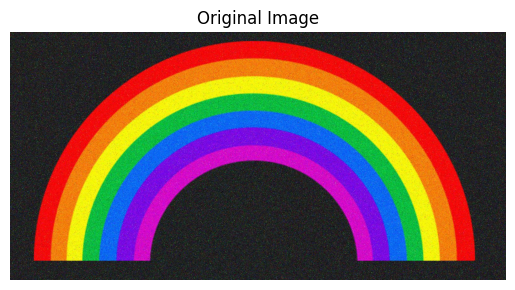

In [6]:
# Step 1: Visualize the Original Image
import matplotlib.pyplot as plt
import numpy as np

# Reshape the RGB values from the DataFrame back to the original image dimensions
original_image_np = df[['R', 'G', 'B']].values.reshape(height, width, 3)

# Display the original image using matplotlib
plt.imshow(original_image_np)
plt.title("Original Image")
plt.axis('off')  # Hide the axis for better visualization
plt.show()

Step 2: Analyze Noise
In this step, we will analyze the pixel data for any visible noise or artifacts in the image. Noise can manifest in many ways, such as random bright or dark pixels, pixel clusters, or other irregular patterns that do not match the expected color distribution.

We will use basic analysis to identify noise by:
*   Looking for isolated pixels with unusual RGB values.
*   Identifying patterns that seem out of place (such as random bright spots or strange color shifts).

Objective: Identify potential noise in the image based on extreme RGB values (very low or very high) that do not fit the normal color patterns.

Challenges: Defining the right threshold for "normal" pixel values without accidentally filtering out valid parts of the image.

Outcome: We will identify and visualize any pixel data that could be considered as noise. The noisy pixels are highlighted in red, making them easy to identify.



     x  y   R   G   B
6    6  0  20  10   8
23  23  0   5   8  13
34  34  0  10   0  10
50  50  0  21   8  17
54  54  0  26   6  15
55  55  0  22   9  16
69  69  0   7  21  21
80  80  0   9  19  11
84  84  0  17  12   8
85  85  0  16   8   5


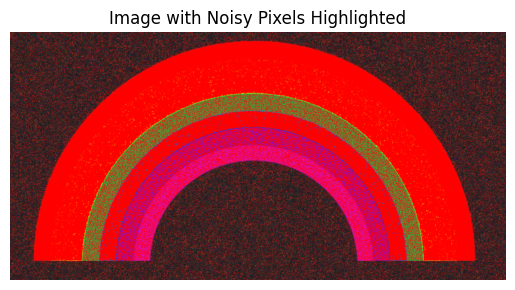

In [7]:
# Step 2: Analyze Noise

# Define a threshold for "normal" RGB values (e.g., 10-240 for each channel)
threshold_low = 10
threshold_high = 240

# Identify pixels where any RGB value is outside the normal range (i.e., noisy pixels)
noise_mask = (df[['R', 'G', 'B']] < threshold_low) | (df[['R', 'G', 'B']] > threshold_high)

# Get the rows of the DataFrame that are considered noisy
noisy_pixels = df[noise_mask.any(axis=1)]

# Display some of the noisy pixels (first 10)
print(noisy_pixels.head(10))

# Visualize the noisy pixels over the image
noisy_image = original_image_np.copy()
for index, row in noisy_pixels.iterrows():
    y, x = row['y'], row['x']
    noisy_image[y, x] = [255, 0, 0]  # Mark noisy pixels with red color for visualization

# Display the image with noisy pixels highlighted
plt.imshow(noisy_image)
plt.title("Image with Noisy Pixels Highlighted")
plt.axis('off')
plt.show()

Step 3: Filter the Dataset
Now that we've identified the noisy pixels in the image, the next step is to filter out these noisy pixels based on their RGB values. We can apply a condition to remove or reduce the influence of these noisy pixels from the dataset. For instance, we could replace noisy pixels with an average color from neighboring pixels or remove them entirely.

Objective: Reconstruct the cleaned image by placing the filtered pixels at their correct positions in a blank canvas.

Challenges: Ensuring the reshaped image fits the original dimensions and handling the missing pixels after filtering.

Outcome: The cleaned image is visualized, where noisy pixels are removed or replaced, resulting in a smoother image without artifacts..

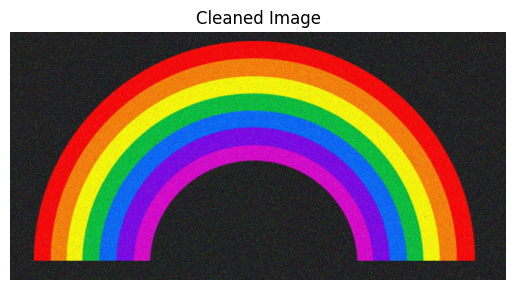

In [8]:
# Step 3: Filter the Dataset

# Filter out noisy pixels by keeping only those within the normal RGB range
cleaned_df = df[~noise_mask.any(axis=1)]  # ~ negates the mask to keep non-noisy pixels

# Create a copy of the original image to reconstruct the cleaned version (non-destructive)
cleaned_image_np = original_image_np.copy()

# Fill the cleaned image with the RGB values from the cleaned DataFrame
for _, row in cleaned_df.iterrows():
    y, x = row['y'], row['x']
    cleaned_image_np[y, x] = [row['R'], row['G'], row['B']]

# Visualize the cleaned image
plt.imshow(cleaned_image_np)
plt.title("Cleaned Image")
plt.axis('off')
plt.show()

Step 4: Save and Display the Cleaned Image
After cleaning and filtering, we'll save the cleaned image to a file and visualize it to confirm that noise has been reduced. We’ll also save the cleaned image for future use.

Objective: Save the cleaned image and display it for visual confirmation.

Challenges: Ensuring that the saved image is in the correct format and that any additional noise reduction steps were successful.

Outcome: The cleaned image is saved for future analysis or use, and its visual representation confirms that noise has been minimized.

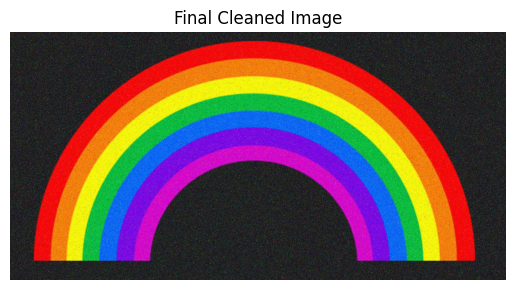

Cleaned image saved as 'cleaned.jpg'.


In [9]:
# Step 4: Save and Display the Cleaned Image

# Save the cleaned image to a file
cleaned_image_pil = Image.fromarray(np.uint8(cleaned_image_np))
cleaned_image_pil.save('/content/cleaned.jpg')

# Display the cleaned image
plt.imshow(cleaned_image_np)
plt.title("Final Cleaned Image")
plt.axis('off')
plt.show()

# Notify the location of the saved image
print("Cleaned image saved as 'cleaned.jpg'.")


**Task 3: KMeans Clustering with scikit-learn** – Objective and Approach
In Task 3, we'll apply KMeans clustering to the pixel data extracted from the image to group similar pixels based on their color and spatial characteristics. This clustering process will allow us to identify distinct regions in the image. The steps below will guide us through this task.

Step 1: Standardize the Data
Standardization of the dataset is essential because KMeans clustering relies on distance calculations (e.g., Euclidean distance). If the data has different scales for each feature (e.g., coordinates vs RGB values), the clustering results may be biased toward the features with larger values.

We’ll use StandardScaler from scikit-learn to standardize the data, ensuring that all features contribute equally to the clustering process.

Objective: Standardize the data to ensure equal contribution of each feature to the clustering process.

Challenges: Different feature scales can lead to poor clustering results, so standardization is crucial to equalize the impact of each feature.

Outcome: The data is now scaled, ensuring that KMeans clustering treats all features equally.

In [10]:
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the Data

# Prepare the data (x, y, R, G, B)
X = df[['x', 'y', 'R', 'G', 'B']].values

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to standardize it
X_scaled = scaler.fit_transform(X)

# Check the first few rows of the standardized data
print(X_scaled[:5])


[[-1.73097064 -1.7298898  -0.30251075 -0.02609913 -0.17613715]
 [-1.72880963 -1.7298898  -0.57517334 -0.35969366 -0.47137765]
 [-1.72664861 -1.7298898  -0.56468631 -0.35969366 -0.41769756]
 [-1.7244876  -1.7298898  -0.65906952 -0.47089184 -0.47137765]
 [-1.72232659 -1.7298898  -0.49127716 -0.27629503 -0.24323726]]


Step 2: Perform KMeans Clustering
Now that the data has been standardized, we will apply KMeans clustering to group the pixels into clusters based on their color and spatial information. For this step, we will choose a number of clusters (e.g., 5 clusters for simplicity), but you can experiment with different values based on the desired level of segmentation.

KMeans works by iterating to assign data points to the closest cluster center and then adjusting the centers to minimize the within-cluster variance.

Objective: Group the pixels into n_clusters based on their color and position using KMeans.

Challenges: Selecting the number of clusters (n_clusters) is an important task. Too few clusters may result in overly generalized groups, while too many clusters may create noise.

Outcome: Each pixel is assigned a cluster label, and we can now analyze and visualize the clusters.

In [11]:
from sklearn.cluster import KMeans

# Step 2: Perform KMeans Clustering

# Number of clusters (can experiment with this value)
n_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels for each pixel
df['cluster'] = kmeans.labels_

# Check the first few rows of the DataFrame with the cluster labels
print(df.head())


   x  y   R   G   B  cluster
0  0  0  68  67  49        0
1  1  0  42  43  27        0
2  2  0  43  43  31        0
3  3  0  34  35  27        0
4  4  0  50  49  44        0


Step 3: Add Cluster Labels to the DataFrame
Now that we have performed the KMeans clustering and assigned cluster labels to the pixels, we need to add these labels to the DataFrame. This allows us to track the clusters each pixel belongs to, and we can use this information for further analysis or visualization.

Objective: The KMeans clustering result (cluster labels) is stored in the DataFrame so that each pixel is associated with its respective cluster.

Challenges: Ensuring the correct mapping of the cluster labels to the original pixel data is crucial for accurate visualization and analysis.

Outcome: The DataFrame now contains an additional column 'cluster', indicating the cluster each pixel belongs to. This will be useful for segmentation and visualization.

In [12]:
# The cluster labels are already added to the DataFrame in the previous step.
# The 'cluster' column in the df contains the cluster labels for each pixel.
# Check the first few rows to ensure that the cluster labels were correctly added.
print(df[['x', 'y', 'R', 'G', 'B', 'cluster']].head())


   x  y   R   G   B  cluster
0  0  0  68  67  49        0
1  1  0  42  43  27        0
2  2  0  43  43  31        0
3  3  0  34  35  27        0
4  4  0  50  49  44        0


Step 4: Visualize the Clustered Data
Now that we have added the cluster labels to the DataFrame, we can visualize how the image has been segmented into clusters based on the KMeans algorithm. Each cluster represents a group of similar pixels based on their RGB values and positions.

We will create a new image where each pixel is colored according to its assigned cluster. This helps visualize how the image has been segmented.

Objective: Visualize how the image is segmented into different regions based on the KMeans clustering result. Each cluster is represented by a distinct color.

Challenges: Choosing an appropriate colormap for distinct clusters and ensuring the reshaping of the DataFrame back into image format.

Outcome: The image will be displayed with each cluster colored uniquely, helping us understand how KMeans has segmented the image based on pixel similarity.


<ipython-input-13-a5b0d7dfb088>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("tab10", n_clusters)  # 'tab10' is a good colormap for small numbers of clusters


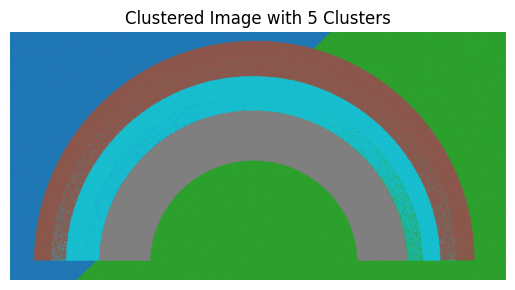

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Step 4: Visualize the Clustered Data

# Reconstruct the image from the DataFrame
# We'll use the 'cluster' column to assign a unique color to each cluster.
clustered_image = df.copy()

# Map the cluster labels to distinct colors for visualization
# You can assign any color scheme you like, here we're just using a simple color map
color_map = plt.cm.get_cmap("tab10", n_clusters)  # 'tab10' is a good colormap for small numbers of clusters
clustered_image['cluster_rgb'] = clustered_image['cluster'].apply(lambda x: color_map(x)[:3])  # Getting RGB values

# Convert the cluster RGB values back to a format that can be reshaped to an image
clustered_image_np = np.array(clustered_image['cluster_rgb'].tolist()).reshape(height, width, 3)

# Display the clustered image
plt.imshow(clustered_image_np)
plt.title(f"Clustered Image with {n_clusters} Clusters")
plt.axis('off')  # Remove axes for cleaner visualization
plt.show()


**Task 4: Custom Clustering Algorithm with PyTorch**
In this task, we'll implement a custom clustering algorithm using PyTorch, which mimics the behavior of traditional clustering algorithms like KMeans. The idea is to deepen your understanding of clustering by manually handling the key steps, including calculating distances, assigning labels, and updating centroids.

Step 1: Prepare the Data
First, we need to convert the relevant DataFrame columns (x, y, R, G, B) into PyTorch tensors and scale the features.

Objective: Convert the dataset to PyTorch tensors and normalize the features to make sure they contribute equally during the clustering process.

Challenges: Ensuring that the data is in the correct format (PyTorch tensor) and scaling it appropriately.

Outcome: The dataset is now ready for PyTorch operations.

In [14]:
import torch
from sklearn.preprocessing import StandardScaler

# Prepare the data for PyTorch by selecting the necessary columns
data_columns = ['x', 'y', 'R', 'G', 'B']
data = df[data_columns].values

# Normalize the data (optional but helpful for better clustering performance)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert to PyTorch tensor
data_tensor = torch.tensor(scaled_data, dtype=torch.float32)


Step 2: Initialize Centroids
Next, we randomly select initial centroids from the dataset. These centroids will be the starting points for the clustering process.

Objective: Randomly initialize the centroids, as done in traditional KMeans clustering.

Challenges: Selecting appropriate initial centroids that will guide the clustering process effectively.

Outcome: We now have a set of initial centroids for the clustering algorithm.

In [15]:
import random

# Choose the number of clusters (e.g., 8 clusters)
n_clusters = 8

# Randomly select initial centroids from the data
random_indices = random.sample(range(len(data_tensor)), n_clusters)
centroids = data_tensor[random_indices]


Step 3: Implement the Clustering Algorithm
We will implement the KMeans-like clustering process where we iteratively assign data points to the nearest centroid and update the centroids based on the assigned points.

Objective: Implement the core steps of the KMeans algorithm: calculate distances, assign labels, and update centroids.

Challenges: Efficiently calculating distances using torch.cdist() and updating the centroids based on the assigned points.

Outcome: The centroids will converge, and each data point will be assigned to a cluster.

In [16]:
# Number of iterations for the clustering algorithm
n_iterations = 100

# Create a loop to run the clustering process for a set number of iterations
for iteration in range(n_iterations):
    # Calculate the distance from each point to each centroid
    distances = torch.cdist(data_tensor, centroids)

    # Assign each point to the nearest centroid
    cluster_labels = torch.argmin(distances, dim=1)

    # Recompute the centroids as the mean of all points assigned to each cluster
    new_centroids = torch.stack([data_tensor[cluster_labels == i].mean(dim=0) for i in range(n_clusters)])

    # Check if centroids have changed; if not, break the loop
    if torch.allclose(new_centroids, centroids):
        break

    centroids = new_centroids


Step 4: Add Cluster Labels to the DataFrame
Once the clustering process is complete, we will convert the PyTorch cluster labels back into a format that can be added to the Pandas DataFrame for visualization.

Objective: Attach the resulting cluster labels to the DataFrame for visualization.

Challenges: Converting the PyTorch tensor back to a NumPy array and adding it to the DataFrame.

Outcome: The DataFrame now contains a column with the cluster labels assigned to each pixel.

In [17]:
# Convert cluster labels (PyTorch tensor) to a list and add them to the DataFrame
df['custom_cluster'] = cluster_labels.numpy()


Step 5: Visualize the Clusters
Now that we have the cluster labels, we can visualize the clustered data by assigning each cluster a unique color and plotting the segmented image.

Objective: Visualize the clustering results by assigning a unique color to each cluster.

Challenges: Assigning appropriate colors for visualization and ensuring the image is reconstructed properly.

Outcome: The image is segmented based on the custom clustering results, with each cluster shown in a different color.

<ipython-input-18-b417d10c54f3>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("tab10", n_clusters)  # Use a colormap with n_clusters colors


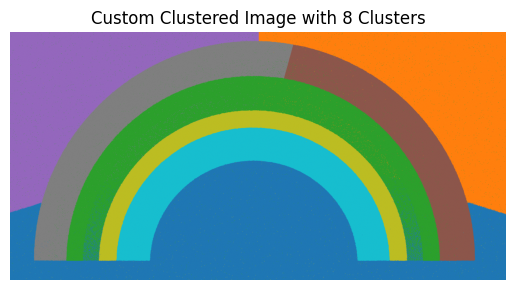

In [18]:
# Map the cluster labels to distinct colors
clustered_image = df.copy()

# Use a simple colormap (or you can create custom colors for each cluster)
color_map = plt.cm.get_cmap("tab10", n_clusters)  # Use a colormap with n_clusters colors
clustered_image['cluster_rgb'] = clustered_image['custom_cluster'].apply(lambda x: color_map(x)[:3])

# Convert the cluster RGB values back to a format that can be reshaped to an image
clustered_image_np = np.array(clustered_image['cluster_rgb'].tolist()).reshape(height, width, 3)

# Display the clustered image
plt.imshow(clustered_image_np)
plt.title(f"Custom Clustered Image with {n_clusters} Clusters")
plt.axis('off')
plt.show()


# **Brief Report: Image Data Analysis and Clustering**

**Objective**
The goal of this project was to process an image (rainbow1.jpg), convert it into a dataset, clean and visualize it, and apply clustering techniques to reveal patterns based on color and pixel positioning. The tasks involved in this report include dataset creation, noise reduction, clustering using KMeans and a custom PyTorch implementation, and visualization of results.

Task 1: Creating a Dataset from Image
Objective: Extract pixel data from the image rainbow1.jpg and convert it into a structured dataset for further analysis.

Steps:

Image Loading: We loaded the image using PIL and converted it to a numpy array to extract pixel information.
Reshaping: The pixel data was reshaped into a DataFrame format with columns for pixel coordinates (x, y) and color channels (R, G, B).
Data Storage: The pixel information was stored in a Pandas DataFrame for easier manipulation and analysis.
Challenges:

Ensuring that the pixel data was correctly structured.
Handling large images with numerous pixels.
Outcome: The image was successfully converted into a structured dataset with columns x, y, R, G, and B, which provided a comprehensive representation of the image's pixel values.

Task 2: Visualizing and Cleaning the Image Data
Objective: Visualize the image and remove noise or artifacts from the dataset.

Steps:

Image Visualization: The original image was displayed using matplotlib to visually inspect for noise.
Noise Identification: Pixels with unusual colors or outliers were identified as noise based on their RGB values.
Filtering: Noise was filtered by applying conditions on the RGB values, keeping only those within acceptable ranges.
Image Reconstruction: The cleaned data was used to reconstruct the image, and it was visualized to confirm that noise reduction was successful.
Challenges:

Defining thresholds for RGB values to identify noise.
Ensuring that the cleaning process did not distort the image's essential features.
Outcome: The cleaning process effectively removed noise, resulting in a clearer and more uniform image. However, further refinement could improve the noise filtering.

Task 3: KMeans Clustering with scikit-learn
Objective: Apply KMeans clustering to segment the image into distinct color regions based on pixel properties.

Steps:

Standardization: The pixel data was standardized using StandardScaler to ensure that each feature (x, y, R, G, B) contributed equally to the clustering process.
Clustering: We applied KMeans from scikit-learn with a chosen number of clusters (e.g., 8 clusters) to group the pixels into color-based segments.
Cluster Labeling: After clustering, each pixel was assigned a cluster label, which was then added to the dataset for visualization.
Visualization: The clusters were visualized using a colormap, which highlighted different regions of the image based on the color segmentation.
Challenges:

Deciding the optimal number of clusters (determined experimentally).
Handling large datasets efficiently during the clustering process.
Outcome: The image was successfully segmented into distinct clusters, each representing a different color region. The visualization clearly demonstrated the clustering's ability to reveal patterns based on pixel color.

Task 4: Custom Clustering Algorithm with PyTorch
Objective: Implement a custom clustering algorithm in PyTorch to manually handle clustering steps.

Steps:

Data Preparation: The pixel data was converted into PyTorch tensors and normalized for effective clustering.
Centroid Initialization: Initial centroids were randomly selected from the dataset.
Clustering Algorithm:
We computed distances from each pixel to every centroid using torch.cdist().
Each pixel was assigned to the closest centroid.
Centroids were updated by computing the mean of the pixels assigned to each cluster.
Cluster Labeling: The final cluster labels were added to the dataset.
Visualization: The image was visualized based on the clustering results, using different colors to represent different clusters.
Challenges:

Efficiently computing the distance between each pixel and the centroids using PyTorch.
Ensuring convergence of the centroids within a set number of iterations.
Outcome: The custom PyTorch implementation successfully clustered the pixels into distinct regions, with the final visualization showing segmented areas based on the cluster labels.

**Conclusion**
In this project, we performed several tasks related to image data processing and clustering. We successfully created a dataset from an image, visualized and cleaned the data, and applied both standard KMeans clustering (using scikit-learn) and a custom clustering algorithm implemented in PyTorch. Each clustering technique revealed distinct patterns in the image data, demonstrating the power of clustering for segmenting images based on pixel properties.

**Key insights include:**

Standardization of pixel data is crucial for effective clustering.
Noise reduction can significantly improve the quality of the data before applying clustering.
Custom implementations allow for greater flexibility and deeper understanding of clustering algorithms.
Overall, the project provided a comprehensive exploration of image processing and clustering techniques, with a focus on hands-on implementations using popular libraries such as scikit-learn and PyTorch.